In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.features import build_features

In [2]:
df = pd.read_csv(r'data\raw\train_data.csv')
test = pd.read_csv(r'data\raw\test_data.csv')

In [3]:
df = build_features.add_motor_hp(df)
df = build_features.add_air_flow_pressure(df)
df = build_features.add_motor_vibe_freq(df)

test = build_features.add_motor_hp(test)
test = build_features.add_air_flow_pressure(test)
test = build_features.add_motor_vibe_freq(test)

### 기초 통계량

In [9]:
df.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,motor_hp,air_flow_pressure,motor_vibe_freq1,motor_vibe_freq2
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2.463000e+03
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369,28.014616,1.490190,-121.180862,2.040463e+01
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113,10.964670,0.841629,0.000000,3.553435e-15
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000,10.000000,0.231000,-121.180862,2.040463e+01
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000,20.000000,0.896000,-121.180862,2.040463e+01
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000,30.000000,1.372000,-121.180862,2.040463e+01
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000,30.000000,1.974000,-121.180862,2.040463e+01
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000,50.000000,4.354000,-121.180862,2.040463e+01


In [10]:
test.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,motor_hp,air_flow_pressure,motor_vibe_freq1,motor_vibe_freq2
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7.389000e+03,7389.00000
mean,2.103129,49.042735,0.699840,27.417935,2373.820003,65.771623,3.345523,2.957369,28.014616,1.471808,-4.244233e+02,940.44368
std,1.163998,8.686208,0.005377,13.234089,687.737182,7.741473,0.644199,2.229811,10.963186,0.814765,1.136945e-13,0.00000
min,0.340000,32.080000,0.490000,5.370000,1200.000000,50.420000,1.970000,0.000000,10.000000,0.238000,-4.244233e+02,940.44368
25%,1.280000,41.510000,0.700000,17.200000,1774.000000,59.110000,2.890000,1.000000,20.000000,0.896000,-4.244233e+02,940.44368
50%,1.940000,48.760000,0.700000,26.170000,2355.000000,65.520000,3.260000,3.000000,30.000000,1.358000,-4.244233e+02,940.44368
75%,2.770000,56.580000,0.700000,35.860000,2972.000000,72.440000,3.730000,5.000000,30.000000,1.939000,-4.244233e+02,940.44368
max,6.240000,65.540000,0.700000,74.000000,3564.000000,82.390000,6.260000,7.000000,50.000000,4.368000,-4.244233e+02,940.44368


### 상관계수

In [11]:
df.corr()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,motor_hp,air_flow_pressure,motor_vibe_freq1,motor_vibe_freq2
air_inflow,1.000000,0.636467,NaN,0.994585,0.549101,0.659138,0.347755,0.169851,0.823294,1.000000,NaN,NaN
air_end_temp,0.636467,1.000000,NaN,0.703042,0.990302,0.999506,0.273699,0.034830,0.165039,0.636467,NaN,NaN
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.994585,0.703042,NaN,1.000000,0.619536,0.723685,0.353014,0.160190,0.780123,0.994585,NaN,NaN
motor_rpm,0.549101,0.990302,NaN,0.619536,1.000000,0.986419,0.237544,-0.015008,0.044495,0.549101,NaN,NaN
motor_temp,0.659138,0.999506,NaN,0.723685,0.986419,1.000000,0.282746,0.040964,0.195220,0.659138,NaN,NaN
motor_vibe,0.347755,0.273699,NaN,0.353014,0.237544,0.282746,1.000000,-0.023323,0.267408,0.347755,NaN,NaN
type,0.169851,0.034830,NaN,0.160190,-0.015008,0.040964,-0.023323,1.000000,0.240715,0.169851,NaN,NaN
motor_hp,0.823294,0.165039,NaN,0.780123,0.044495,0.195220,0.267408,0.240715,1.000000,0.823294,NaN,NaN
air_flow_pressure,1.000000,0.636467,NaN,0.994585,0.549101,0.659138,0.347755,0.169851,0.823294,1.000000,NaN,NaN


In [12]:
test.corr()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,motor_hp,air_flow_pressure,motor_vibe_freq1,motor_vibe_freq2
air_inflow,1.000000,0.610628,-0.007383,0.991016,0.518147,0.635348,0.946012,0.186551,0.814605,0.999874,NaN,NaN
air_end_temp,0.610628,1.000000,-0.008984,0.685231,0.987989,0.995482,0.670457,0.049235,0.122494,0.610420,NaN,NaN
out_pressure,-0.007383,-0.008984,1.000000,-0.007960,-0.006895,-0.009131,-0.002926,-0.013889,-0.005379,0.008085,NaN,NaN
motor_current,0.991016,0.685231,-0.007960,1.000000,0.594143,0.706455,0.954707,0.175325,0.768435,0.990873,NaN,NaN
motor_rpm,0.518147,0.987989,-0.006895,0.594143,1.000000,0.981809,0.588670,-0.003585,-0.004813,0.517968,NaN,NaN
motor_temp,0.635348,0.995482,-0.009131,0.706455,0.981809,1.000000,0.691989,0.055805,0.152482,0.635140,NaN,NaN
motor_vibe,0.946012,0.670457,-0.002926,0.954707,0.588670,0.691989,1.000000,0.111714,0.773935,0.945951,NaN,NaN
type,0.186551,0.049235,-0.013889,0.175325,-0.003585,0.055805,0.111714,1.000000,0.240715,0.186339,NaN,NaN
motor_hp,0.814605,0.122494,-0.005379,0.768435,-0.004813,0.152482,0.773935,0.240715,1.000000,0.814554,NaN,NaN
air_flow_pressure,0.999874,0.610420,0.008085,0.990873,0.517968,0.635140,0.945951,0.186339,0.814554,1.000000,NaN,NaN


### pair plot

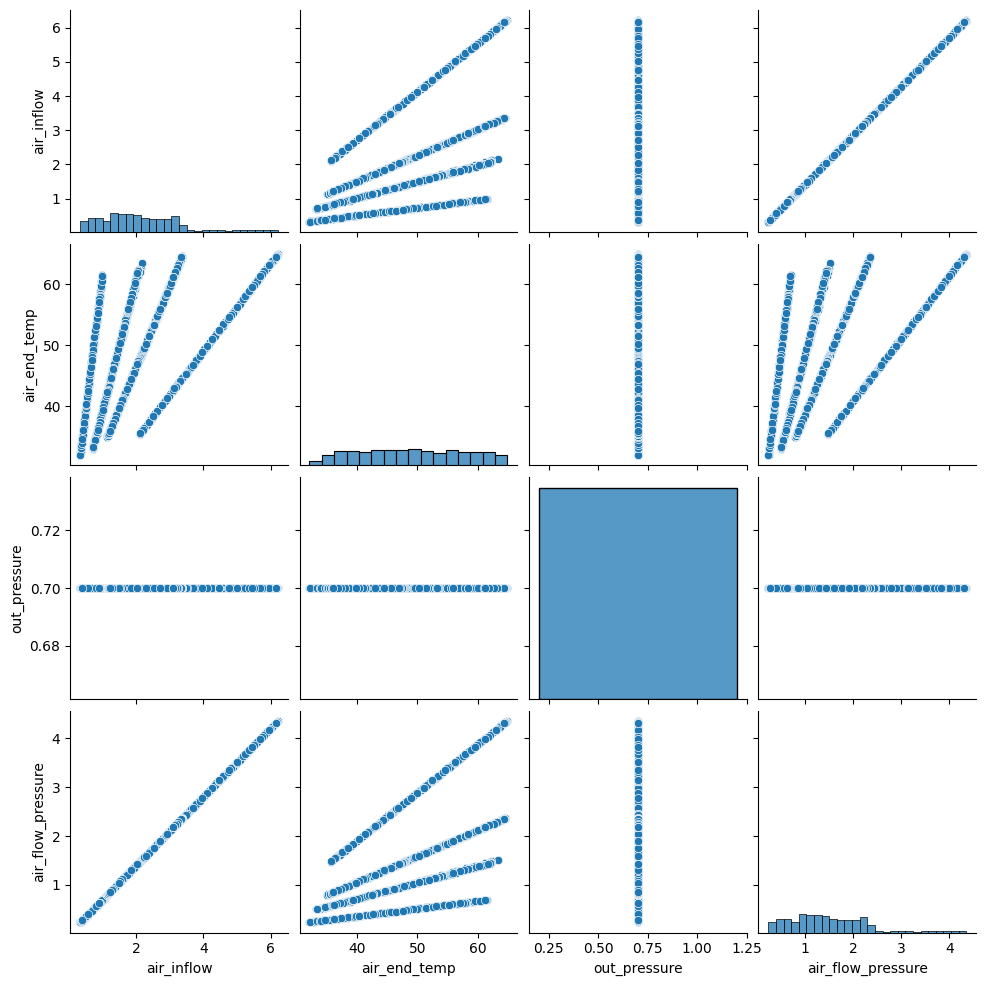

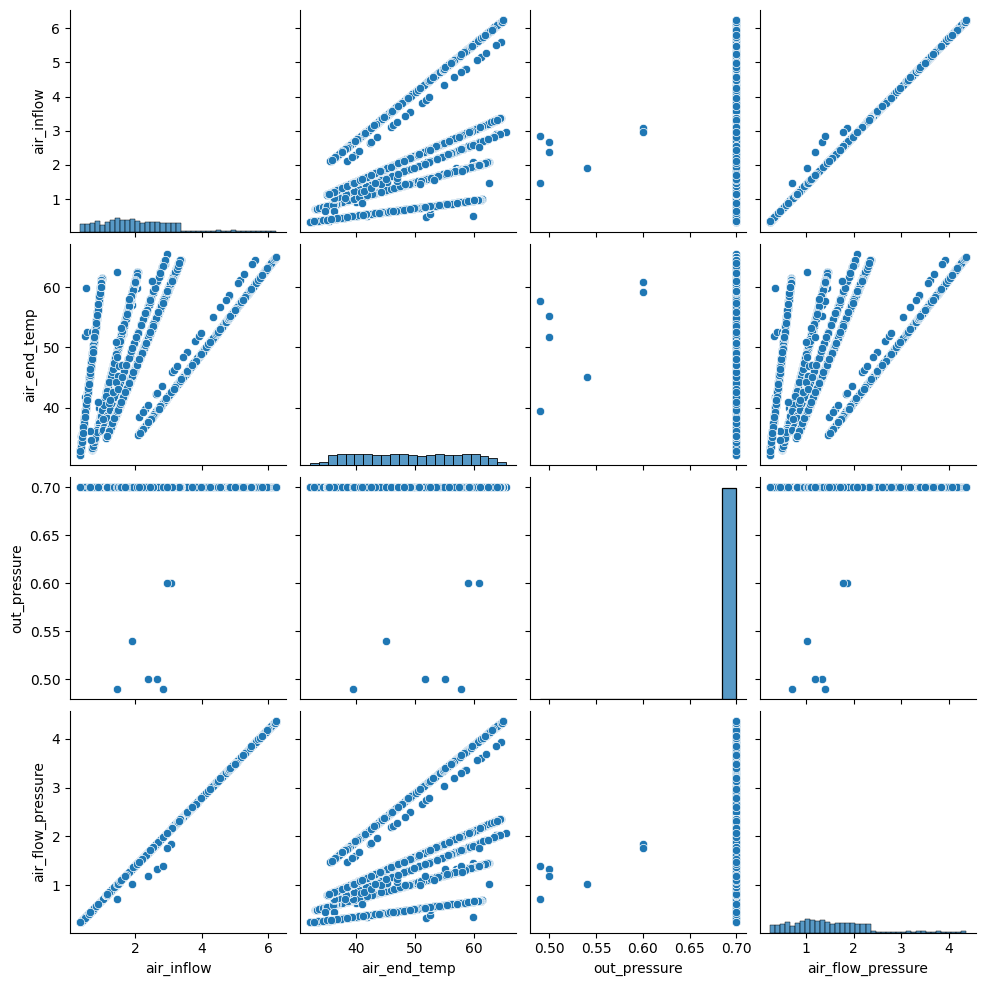

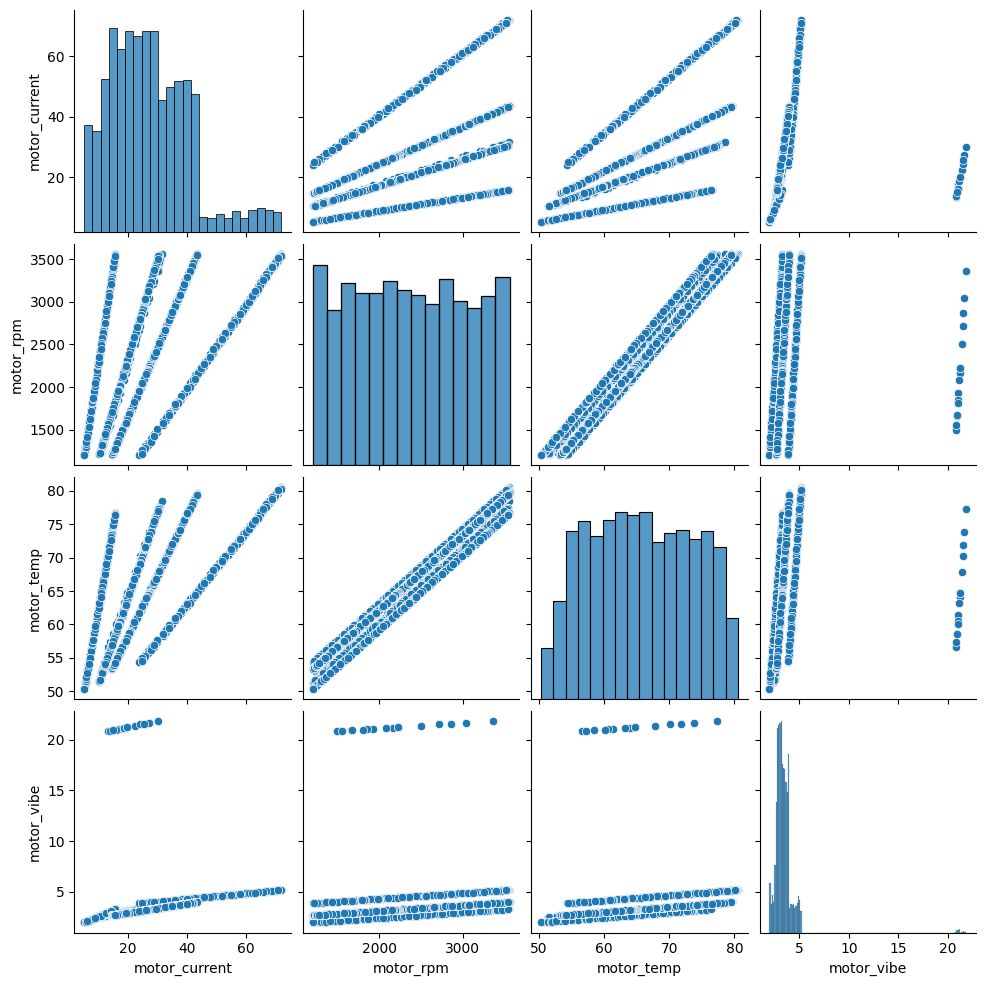

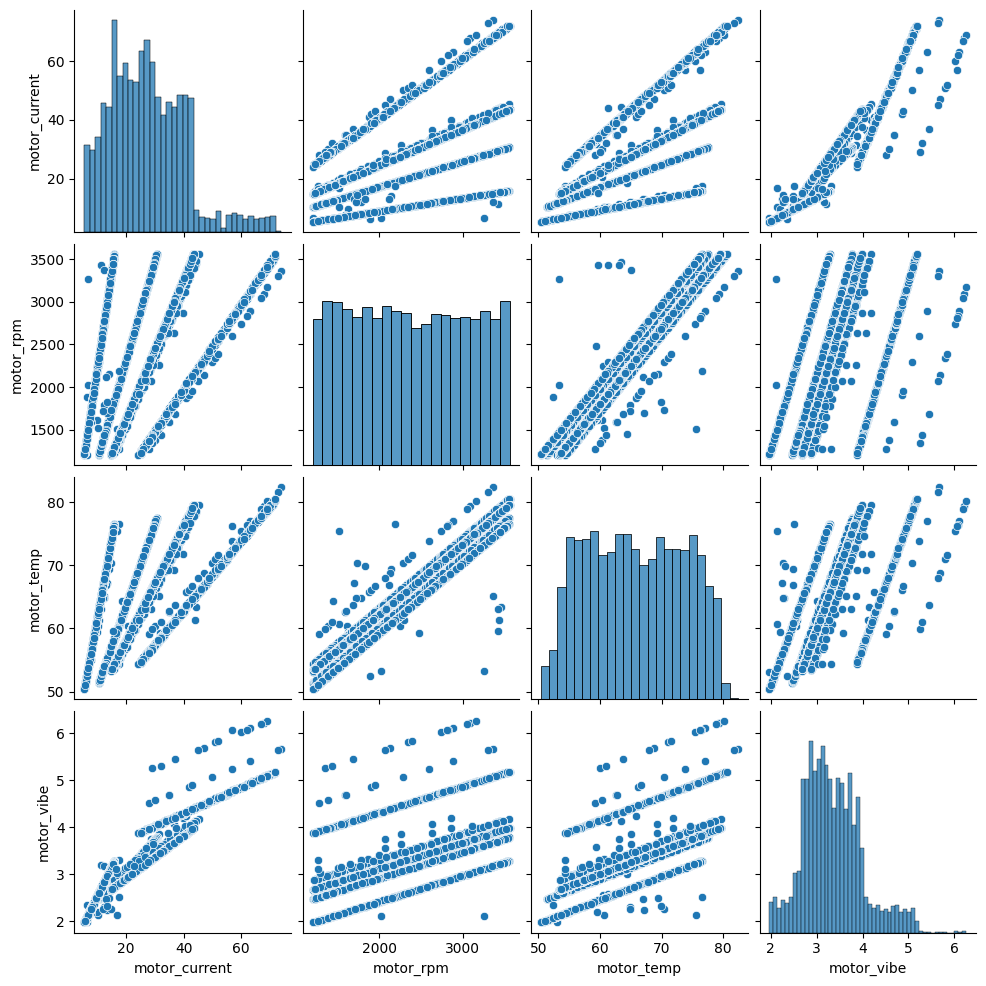

In [7]:
sns.pairplot(df[['air_inflow', 'air_end_temp', 'out_pressure', "air_flow_pressure"]])
sns.pairplot(test[['air_inflow', 'air_end_temp', 'out_pressure', "air_flow_pressure"]])

sns.pairplot(df[['motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']])
sns.pairplot(test[['motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']])

# sns.pairplot(df[["air_flow_pressure", "motor_vibe_freq1", "motor_vibe_freq2"]])
# sns.pairplot(test[["air_flow_pressure", "motor_vibe_freq1", "motor_vibe_freq2"]])

In [8]:
import pandas_profiling as pp
profile = pp.ProfileReport(test)

# 리포트를 HTML 형식으로 출력
profile.to_file("test_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Python\Python38\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]